In [56]:
import pandas as pd
import io
import math

import matplotlib.pyplot as plt
import numpy as np

import string
from IPython.display import display
from numpy import random, mean, var, std
import os

# ДАННЫЕ

In [57]:
df = pd.read_csv("231-232/result.csv")
df

,Error,Time,Mean P,P1,P2,P3,P4
0,0.011418,850.0,0.212626,0.191760,0.209701,0.244986,0.204060
1,0.012133,950.0,0.190515,0.162474,0.177997,0.210069,0.211519
2,0.013454,1050.0,0.175580,0.153230,0.184315,0.154968,0.209807
3,0.011829,1150.0,0.146375,0.124794,0.159463,0.128194,0.173051
4,0.008172,1250.0,0.146179,0.123096,0.146096,0.157496,0.158029
5,0.004929,1350.0,0.131211,0.132221,0.138411,0.116982,0.137231
6,0.002114,1450.0,0.110753,0.105963,0.108458,0.114683,0.113910
7,0.005514,1550.0,0.113937,0.101823,0.128567,0.112020,0.113339
8,0.005158,1650.0,0.099084,0.097500,0.087940,0.097980,0.112915
9,0.003719,1750.0,0.089497,0.083815,0.083636,0.091229,0.099310


# Параметры

In [58]:
#223-224
#P_dc=0.0010926701786732134
#QE_mu=0.11601676824594269
#226-227
#P_dc=0.00103128476892993
#QE_mu=0.11222038235360941
#231-231
#P_dc=0.00088952042644191
#QE_mu-0.088892777042547


P_dc=0.00088952042644191
QE_mu-0.088892777042547

#t_Gate_Width = 0.000000009
#t_impulse=0.000000001

kappa=0.01
q=1
alpha = 0.25
l=10

z1=((-alpha)*l)/10
t_prKanala = pow(10,z1)

t_prKanala

0.5623413251903491

# Вычисления

In [59]:
KS_old_Y_axis=[]
QBER_Y_axis=[]
KS_Y_axis=[]
QBER_old_Y_axis=[]
X_axis=[]

for i in range(df.shape[0]):
    
    P_ap=df.at[i, "Mean P"]
    Time=df.at[i, "Time"]
    P_res=P_dc+P_ap
    
    D_old=kappa+(P_res)/(2*q*QE_mu*t_prKanala)
    #print(D_old)
    #ksi=(QE_mu*(3-2*D*math.log(D,2)+(2+2*D)*math.log(1+D,2)))/(Time*0.000000001)
    ksi_old=-1
    if(D_old<=1):    #иначе логарифм
        #phi_arg_old=1-2*D_old
        phi_old=D_old*math.log(D_old,2)+(1-D_old)*math.log(1-D_old,2)               #(1-phi_arg_old)*math.log(1-phi_arg_old, 2)+(1+phi_arg_old)*math.log(1+phi_arg_old, 2)
        vz_inf_old=phi_old
        key_part_old=1+2*vz_inf_old
        ksi_old=(QE_mu*(1-2*(D_old*math.log(2*D_old,2)+(1-D_old)*math.log(2-2*D_old, 2))))/(Time*0.000000001)
    
    
    #if(D_old>1):#иначе логарифм
    #ksi_old=0
        
    QBER_old_Y_axis.append(D_old)
    KS_old_Y_axis.append(ksi_old)
    X_axis.append(Time)
    
    
    D=(P_res+2*q*QE_mu*t_prKanala*kappa)/(P_res+2*q*QE_mu*t_prKanala*(1+kappa))
    
    #arg_phi=1-2*D
    phi=D*math.log(D,2)+(1-D)*math.log(1-D,2)
    vz_inf=phi
    key_part=1+2*vz_inf
    ksi=QE_mu*key_part/(Time*0.000000001)#(QE_mu*(1-2*(D1*math.log(2*D1,2)+(1-D1)*math.log(2-2*D1, 2))))/(Time*0.000000001)
    
    QBER_Y_axis.append(D)
    KS_Y_axis.append(ksi)
np_QBER_Y_axis=np.array(QBER_Y_axis)
np_KS_Y_axis=np.array(KS_Y_axis)
a = np.asarray([np_QBER_Y_axis, np_KS_Y_axis])
a=np.transpose(a)
np.savetxt("231-232.csv", a, delimiter=",")

# ГРАФИКИ

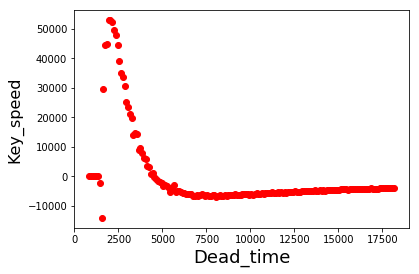

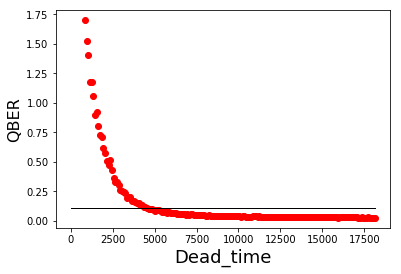

In [60]:
plt.plot(X_axis, KS_old_Y_axis, 'ro')
#plt.axis([min(mass_plot_X)-min(mass_plot_X)*0.1, max(mass_plot_X)+max(mass_plot_X)*0.1, min(mass_plot_Y)-min(mass_plot_Y)*0.1, max(mass_plot_Y)+max(mass_plot_Y)*0.1])
plt.xlabel('Dead_time', fontsize=18)
plt.ylabel('Key_speed', fontsize=16)
plt.show()

plt.plot(X_axis, QBER_old_Y_axis, 'ro')
#plt.axis([min(mass_plot_X)-min(mass_plot_X)*0.1, max(mass_plot_X)+max(mass_plot_X)*0.1, min(mass_plot_Y)-min(mass_plot_Y)*0.1, max(mass_plot_Y)+max(mass_plot_Y)*0.1])
plt.xlabel('Dead_time', fontsize=18)
plt.ylabel('QBER', fontsize=16)
plt.plot([0, max(X_axis)], [0.11, 0.11], color='k', linestyle='-', linewidth=1)
plt.show()

\begin{equation*}
QBER =
\frac{Rerror}{Rsift}
\end{equation*}

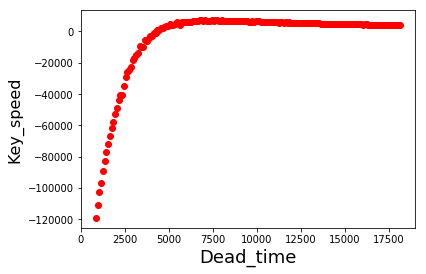

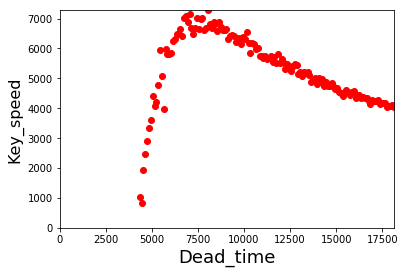

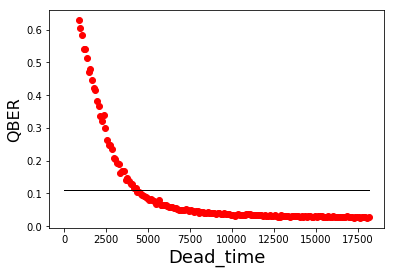

In [61]:
plt.plot(X_axis, KS_Y_axis, 'ro')
#plt.axis([min(mass_plot_X)-min(mass_plot_X)*0.1, max(mass_plot_X)+max(mass_plot_X)*0.1, min(mass_plot_Y)-min(mass_plot_Y)*0.1, max(mass_plot_Y)+max(mass_plot_Y)*0.1])

#plt.axis([0, max(X_axis), 0, max(KS_Y_axis)])
plt.xlabel('Dead_time', fontsize=18)
plt.ylabel('Key_speed', fontsize=16)
plt.show()

plt.plot(X_axis, KS_Y_axis, 'ro')
#plt.axis([min(mass_plot_X)-min(mass_plot_X)*0.1, max(mass_plot_X)+max(mass_plot_X)*0.1, min(mass_plot_Y)-min(mass_plot_Y)*0.1, max(mass_plot_Y)+max(mass_plot_Y)*0.1])

plt.axis([0, max(X_axis), 0, max(KS_Y_axis)])
plt.xlabel('Dead_time', fontsize=18)
plt.ylabel('Key_speed', fontsize=16)
plt.show()

plt.plot(X_axis, QBER_Y_axis, 'ro')
plt.xlabel('Dead_time', fontsize=18)
plt.ylabel('QBER', fontsize=16)
plt.plot([0, max(X_axis)], [0.11, 0.11], color='k', linestyle='-', linewidth=1)
plt.show()

\begin{equation*}
QBER =
\frac{Rerror}{Rerror+Rsift}
\end{equation*}

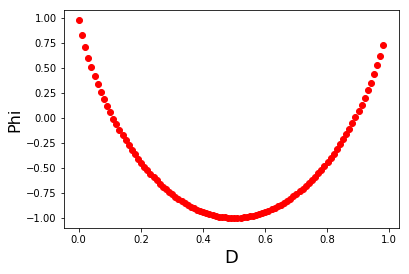

0.05568494550666481

In [62]:
Y=[]
X=[]
arr=np.arange(0.001, 0.99, 0.01)
#print(arr)
for D in arr:
    X.append(D)
    #arg_phi=1-2*D
    phi=D*math.log(D,2)+(1-D)*math.log(1-D,2)
    
    Y.append(1+2*phi)
    
    
plt.plot(arr, Y, 'ro')
#plt.axis([min(mass_plot_X)-min(mass_plot_X)*0.1, max(mass_plot_X)+max(mass_plot_X)*0.1, min(mass_plot_Y)-min(mass_plot_Y)*0.1, max(mass_plot_Y)+max(mass_plot_Y)*0.1])
plt.xlabel('D', fontsize=18)
plt.ylabel('Phi', fontsize=16)
#plt.plot([0, max(X_axis)], [0.11, 0.11], color='k', linestyle='-', linewidth=1)
plt.show()

arr[10]
Y[10]
